# Projekt zaliczeniowy

### Bootcamp Data Science
##### Przewidywanie wzięcia pożyczki

Input variables:

- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels

Outcomes:

- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tworzę funkcję, która wyświtli histogram przed i po zlogarytmowaniu (analiza skośności)

In [0]:
def hist_plot(dataset):
    """
    Show histogram for dataset and log of dataset (using numpy.log1p to avoid log of 0).
    Matlotlib.pyplot library needed - import matplotlib.pyplot as plt to use the function.   
    Keyword arguments:
    dataset -- pandas series
    """
    legend = dataset.name

    plt.hist(dataset, color=['orange'])
    plt.xlabel(dataset.name)
    plt.ylabel("Frequency")
    plt.legend(legend)
    plt.title('Histogram\n ' + dataset.name)
    plt.show()
    
    legend = ['Log1p('+dataset.name+')']
    
    plt.hist((np.log1p(dataset)), color=['orange'])
    plt.xlabel('Log1p('+dataset.name+')')
    plt.ylabel("Frequency")
    plt.legend(legend)
    plt.title('Histogram\n '+ 'Log1p('+dataset.name+')')
    plt.show()

In [0]:
url = 'https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv'
df = pd.read_csv(url, encoding = "latin1")

In [4]:
print(df.shape)
nr_rows = df.shape[0]
print(nr_rows)
nr_columns = df.shape[1]
print(nr_columns)
df.info()

(87020, 26)
87020
26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted 

In [5]:
df.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'],
      dtype='object')

# Analiza danych

In [6]:
df_clean = df.drop(['LoggedIn','ID'], axis=1)
df_clean.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,200000.0,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,10,HBXX,920000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,17,HBXX,500000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


- funkcja opisująca dane

In [0]:
def data_description(df):     
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
    str = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis], axis = 1, sort=False)
   
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [8]:
details = data_description(df_clean)
display(details.round(decimals=2))

Data shape: (87020, 24)
___________________________
Data types:
 object     12
float64     8
int64       4
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,uniques,skewness,kurtosis
Gender,object,87020,2,0,0.00,"[[Female, Male]]",NaN,NaN
City,object,86017,698,1003,1.15,"[[Delhi, Mumbai, Panchkula, Saharsa, Bengaluru...",NaN,NaN
Monthly_Income,int64,87020,5825,0,0.00,"[[20000, 35000, 22500, 100000, 45000, 70000, 7...",167.56,31361.57
DOB,object,87020,11345,0,0.00,"[[23-May-78, 07-Oct-85, 10-Oct-81, 30-Nov-87, ...",NaN,NaN
Lead_Creation_Date,object,87020,92,0,0.00,"[[15-May-15, 04-May-15, 19-May-15, 09-May-15, ...",NaN,NaN
Loan_Amount_Applied,float64,86949,278,71,0.08,"[[300000.0, 200000.0, 600000.0, 1000000.0, 500...",5.64,72.21
Loan_Tenure_Applied,float64,86949,12,71,0.08,"[[5.0, 2.0, 4.0, 0.0, 3.0, 1.0, 10.0, 7.0, nan...",0.26,-1.43
Existing_EMI,float64,86949,3754,71,0.08,"[[0.0, 25000.0, 15000.0, 2597.0, 4600.0, 1200....",211.77,49764.85
Employer_Name,object,86949,43568,71,0.08,"[[CYBOSOL, TATA CONSULTANCY SERVICES LTD (TCS)...",NaN,NaN
Salary_Account,object,75256,58,11764,13.52,"[[HDFC Bank, ICICI Bank, State Bank of India, ...",NaN,NaN


In [9]:
df_clean.corr()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,Disbursed
Monthly_Income,1.000000,0.003050,-0.004282,0.135974,0.020243,0.036595,-0.001746,-0.014963,0.019951,0.034169,0.006089,0.000219
Loan_Amount_Applied,0.003050,1.000000,0.502259,0.064065,0.320854,0.413282,0.138644,-0.179344,0.189698,0.245000,-0.002743,0.032846
Loan_Tenure_Applied,-0.004282,0.502259,1.000000,0.054314,0.240422,-0.038525,0.138085,-0.138171,-0.113117,-0.195484,-0.108432,0.037109
Existing_EMI,0.135974,0.064065,0.054314,1.000000,0.016414,0.011700,0.000468,-0.016446,-0.002936,0.008085,-0.031013,0.015621
Var5,0.020243,0.320854,0.240422,0.016414,1.000000,0.294662,-0.084105,-0.539847,0.203371,0.276745,0.357712,0.117146
Loan_Amount_Submitted,0.036595,0.413282,-0.038525,0.011700,0.294662,1.000000,0.381091,-0.320479,0.764074,0.915282,-0.045967,0.043124
Loan_Tenure_Submitted,-0.001746,0.138644,0.138085,0.000468,-0.084105,0.381091,1.000000,-0.094365,0.306699,0.091181,0.031854,-0.001593
Interest_Rate,-0.014963,-0.179344,-0.138171,-0.016446,-0.539847,-0.320479,-0.094365,1.000000,-0.111722,-0.242168,0.057337,-0.092410
Processing_Fee,0.019951,0.189698,-0.113117,-0.002936,0.203371,0.764074,0.306699,-0.111722,1.000000,0.721399,0.097977,0.033229
EMI_Loan_Submitted,0.034169,0.245000,-0.195484,0.008085,0.276745,0.915282,0.091181,-0.242168,0.721399,1.000000,0.114507,0.049190


### 1. Gender

In [10]:
df_clean['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

In [0]:
df_clean['Gender'] = df_clean.Gender.replace({'Male':0, 'Female':1})

In [12]:
df_clean['Gender'].value_counts()

0    49848
1    37172
Name: Gender, dtype: int64

### 2. City

In [13]:
df_clean['City'].value_counts()

Delhi                  12527
Bengaluru              10824
Mumbai                 10795
Hyderabad               7272
Chennai                 6916
Pune                    5207
Kolkata                 2888
Ahmedabad               1788
Jaipur                  1331
Gurgaon                 1212
Coimbatore              1147
Thane                    905
Chandigarh               870
Surat                    802
Visakhapatnam            764
Indore                   734
Vadodara                 624
Nagpur                   594
Lucknow                  580
Ghaziabad                560
Bhopal                   513
Kochi                    492
Patna                    461
Faridabad                447
Madurai                  375
Noida                    373
Gautam Buddha Nagar      338
Dehradun                 314
Raipur                   289
Bhubaneswar              277
                       ...  
Modasa                     1
Chinnamiram                1
Madhepura                  1
Kishanganj    

In [14]:
df_clean['City'].value_counts()/nr_rows

Delhi                  0.143955
Bengaluru              0.124385
Mumbai                 0.124052
Hyderabad              0.083567
Chennai                0.079476
Pune                   0.059837
Kolkata                0.033188
Ahmedabad              0.020547
Jaipur                 0.015295
Gurgaon                0.013928
Coimbatore             0.013181
Thane                  0.010400
Chandigarh             0.009998
Surat                  0.009216
Visakhapatnam          0.008780
Indore                 0.008435
Vadodara               0.007171
Nagpur                 0.006826
Lucknow                0.006665
Ghaziabad              0.006435
Bhopal                 0.005895
Kochi                  0.005654
Patna                  0.005298
Faridabad              0.005137
Madurai                0.004309
Noida                  0.004286
Gautam Buddha Nagar    0.003884
Dehradun               0.003608
Raipur                 0.003321
Bhubaneswar            0.003183
                         ...   
Modasa  

In [15]:
df_clean['City'] = df_clean.City.map({'Delhi':'Delhi', 'Bengaluru':'Bengaluru', "Mumbai":'Mumbai', 'Hyderabad':'Hyderabad', 
                                  'Chennai': 'Chennai', 'Pune': 'Pune','Kolkata':'Kolkata','Ahmedabad':'Ahmedabad',
                              'Jaipur':'Jaipur','Gurgaon':'Gurgaon','Coimbatore':'Coimbatore'}).fillna('Other')
df_clean.City.value_counts()

Other         25113
Delhi         12527
Bengaluru     10824
Mumbai        10795
Hyderabad      7272
Chennai        6916
Pune           5207
Kolkata        2888
Ahmedabad      1788
Jaipur         1331
Gurgaon        1212
Coimbatore     1147
Name: City, dtype: int64

### 3. Monthly_Income

In [16]:
df_clean['Monthly_Income'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).round()

count        87020.0
mean         58850.0
std        2177511.0
min              0.0
25%          16500.0
50%          25000.0
75%          40000.0
95%          95000.0
99%         250000.0
max      444554443.0
Name: Monthly_Income, dtype: float64

- warto rozważyć usunięcie rekordów z wartościami odstającymi, możliwe, że zostały błędnie wprowadzone, jednak projek nie dopuszcza usuwania obserwacji

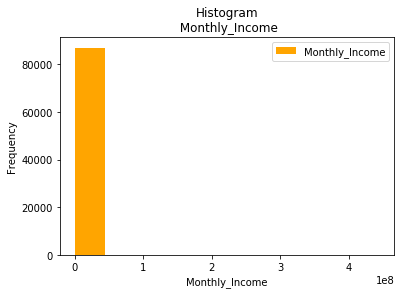

In [17]:
legend = ['Monthly_Income']

plt.hist(df_clean['Monthly_Income'], color=['orange'])
plt.xlabel("Monthly_Income")
plt.ylabel("Frequency")
plt.legend(legend)
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
plt.title('Histogram\n Monthly_Income')
plt.show()



# plt.hist((df_clean['Monthly_Income'])


- rozład jest skośny - logarytm (log1p - uniknięcie błędu dla wartości 0)

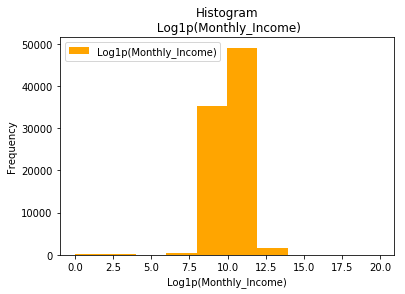

In [18]:
legend = ['Log1p(Monthly_Income)']

plt.hist(np.log1p(df_clean['Monthly_Income']), color=['orange'])
plt.xlabel("Log1p(Monthly_Income)")
plt.ylabel("Frequency")
plt.legend(legend)
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
plt.title('Histogram\n Log1p(Monthly_Income)')
plt.show()


# plt.hist(np.log1p(df_clean['Monthly_Income']))

In [19]:
print('skośność przed transforamcją logarytmiczną: \n', df_clean['Monthly_Income'].skew().round(2))

skośność przed transforamcją logarytmiczną: 
 167.56


In [20]:
print('skośność po transforamcji logarytmicznej: \n', np.log1p(df_clean['Monthly_Income']).skew().round(2))

skośność po transforamcji logarytmicznej: 
 -3.89


In [0]:
df_clean['Log_Monthly_Income'] = np.log1p(df_clean['Monthly_Income'])

### 4. DOB

In [22]:
df_clean['DOB'].describe()

count         87020
unique        11345
top       11-Nov-80
freq            306
Name: DOB, dtype: object

In [0]:
new_DOB = pd.to_datetime(df_clean['DOB'])

In [0]:
new_DOB_year = [x.year for x in new_DOB]

- weryfikuję jakość danych - np. 2015 rok jako rok urodzenia nie jest właściwy, dla części danych data urodzenia jest taka sama jak data złożenia wniosku

In [25]:
pd.DataFrame(new_DOB_year)[pd.DataFrame(new_DOB_year)<=2030][pd.DataFrame(new_DOB_year)>=1998].dropna()

,0
60139,2015.0
60141,2015.0
60496,2015.0
60498,2015.0
62623,2029.0
64278,2015.0
70130,2015.0
74092,2015.0
74093,2015.0
74094,2015.0


In [26]:
df.loc[62623:62624]

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
62623,ID089818O30,Male,Mumbai,41667,24-May-29,08-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,5,0,0
62624,ID089819P40,Male,Kalka,25000,13-Aug-74,08-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0


In [27]:
df.loc[74101:74104]

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
74101,ID106343D30,Male,Mumbai,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0
74102,ID106344E40,Male,Delhi,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0
74103,ID106345F00,Male,Ghaziabad,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0
74104,ID106347H20,Male,Mumbai,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0


In [28]:
print('min DOB', new_DOB.min())
print('max DOB', new_DOB.max())

min DOB 1969-01-01 00:00:00
max DOB 2068-12-29 00:00:00


In [29]:
pd.to_datetime(df_clean['DOB']).describe()

count                   87020
unique                  11345
top       1980-11-11 00:00:00
freq                      306
first     1969-01-01 00:00:00
last      2068-12-29 00:00:00
Name: DOB, dtype: object

In [0]:
df_clean['new_DOB'] = pd.to_datetime(df_clean['DOB'])

- odejmuję 100 lat od danych, dla których powinien zostać zmieniony wiek

In [31]:
df_clean['new_DOB'][df_clean['new_DOB'].apply(lambda x: x.year) > 2015] = df_clean['new_DOB'][df_clean['new_DOB'].apply(lambda x: x.year) > 2015].apply(lambda dt: dt.replace(year=dt.year-100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
# weryfiacja
print(df.DOB.loc[87003])
print(df_clean['new_DOB'].loc[87003])

01-Jan-60
1960-01-01 00:00:00


In [0]:
df_clean['DOB_Year'] = df_clean['new_DOB'].apply(lambda x: x.year)

### Lead_Creation_Date

In [34]:
df_clean['Lead_Creation_Date'].describe()

count         87020
unique           92
top       03-Jul-15
freq           2315
Name: Lead_Creation_Date, dtype: object

In [0]:
df_clean['new_Lead_Creation_Date'] = pd.to_datetime(df_clean['Lead_Creation_Date'])

In [0]:
df_clean['LCD_Year'] = df_clean['new_Lead_Creation_Date'].apply(lambda x: x.year)

In [0]:
df_clean['Age'] = df_clean['LCD_Year'] - df_clean['DOB_Year']

In [38]:
df_clean[df_clean['Age']<18] # błędnie wypełniona data urodzenia, wskazuje na potrzebę poprawy jakości zbieranych danych

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Log_Monthly_Income,new_DOB,DOB_Year,new_Lead_Creation_Date,LCD_Year,Age
60139,0,Bengaluru,0,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-06,2015,2015-07-06,2015,0
60141,0,Hyderabad,0,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-06,2015,2015-07-06,2015,0
60496,0,Ahmedabad,8333,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,9.028099,2015-07-06,2015,2015-07-06,2015,0
60498,0,Other,0,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-06,2015,2015-07-06,2015,0
64278,0,Bengaluru,0,10-Jul-15,10-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-10,2015,2015-07-10,2015,0
70130,1,Other,24000,20-Jun-15,17-Jul-15,100000.0,0.0,8.0,0,NaN,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,7,0,10.085851,2015-06-20,2015,2015-07-17,2015,0
74092,0,Other,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-21,2015,2015-07-21,2015,0
74093,0,Delhi,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-21,2015,2015-07-21,2015,0
74094,0,Delhi,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-21,2015,2015-07-21,2015,0
74095,0,Hyderabad,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,NaN,Y,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,0,0,0.000000,2015-07-21,2015,2015-07-21,2015,0


### Loan_Amount_Applied, Loan_Amount_Submitted

In [39]:
df_clean['Loan_Amount_Applied'].value_counts()

0.0          28853
100000.0     14311
200000.0     13058
300000.0      9995
500000.0      9762
1000000.0     4195
50000.0       1245
400000.0       546
150000.0       540
600000.0       391
1500000.0      374
700000.0       343
800000.0       227
2000000.0      215
60000.0        207
250000.0       192
30000.0        158
350000.0       144
2500000.0      134
70000.0        130
20000.0        109
1200000.0      105
80000.0         89
75000.0         89
40000.0         88
25000.0         82
3000000.0       80
10000.0         58
450000.0        47
900000.0        41
             ...  
22500.0          1
157000.0         1
1780000.0        1
370000.0         1
132000.0         1
5500.0           1
605000.0         1
139450.0         1
4800000.0        1
5.0              1
9499.0           1
740000.0         1
216000.0         1
1650000.0        1
920000.0         1
312000.0         1
497000.0         1
349000.0         1
109000.0         1
425000.0         1
8500.0           1
290000.0    

In [40]:
df_clean[df_clean['Loan_Amount_Applied'].isnull()]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Log_Monthly_Income,new_DOB,DOB_Year,new_Lead_Creation_Date,LCD_Year,Age
42858,0,Other,40000,15-Feb-79,18-Jun-15,NaN,NaN,NaN,NaN,NaN,Y,8,HBXC,100000.0,2.0,16.35,1000.0,4913.05,Y,Web-browser,B,S157,5,0,10.596660,1979-02-15,1979,2015-06-18,2015,36
43057,0,Other,40000,22-Feb-83,19-Jun-15,NaN,NaN,NaN,NaN,NaN,Y,13,HCXF,100000.0,2.0,17.50,2000.0,4968.28,Y,Web-browser,B,S143,5,0,10.596660,1983-02-22,1983,2015-06-19,2015,32
48356,0,Pune,25500,03-Jul-92,24-Jun-15,NaN,NaN,NaN,NaN,NaN,Y,8,HBXB,100000.0,3.0,27.00,2000.0,4082.52,Y,Web-browser,B,S133,5,0,10.146473,1992-07-03,1992,2015-06-24,2015,23
49137,1,Other,38000,08-Jun-88,25-Jun-15,NaN,NaN,NaN,NaN,NaN,N,10,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,D,S122,7,0,10.545368,1988-06-08,1988,2015-06-25,2015,27
50104,0,Pune,38000,31-Oct-87,26-Jun-15,NaN,NaN,NaN,NaN,NaN,Y,14,HBXB,400000.0,4.0,23.50,8000.0,12930.41,Y,Web-browser,B,S143,5,0,10.545368,1987-10-31,1987,2015-06-26,2015,28
51007,1,Pune,59000,05-Jun-91,27-Jun-15,NaN,NaN,NaN,NaN,NaN,N,15,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,D,S122,7,0,10.985310,1991-06-05,1991,2015-06-27,2015,24
59351,1,Mumbai,18500,11-Dec-88,05-Jul-15,NaN,NaN,NaN,NaN,NaN,N,1,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,7,0,9.825580,1988-12-11,1988,2015-07-05,2015,27
61647,0,Pune,32000,08-Dec-83,07-Jul-15,NaN,NaN,NaN,NaN,NaN,Y,12,HBXD,520000.0,4.0,14.49,5148.0,14337.91,Y,Web-browser,G,S122,5,0,10.373522,1983-12-08,1983,2015-07-07,2015,32
61865,1,Pune,22500,23-Mar-88,07-Jul-15,NaN,NaN,NaN,NaN,NaN,N,2,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,3,0,10.021315,1988-03-23,1988,2015-07-07,2015,27
67526,1,Other,21240,23-Mar-93,14-Jul-15,NaN,NaN,NaN,NaN,NaN,N,2,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,7,0,9.963689,1993-03-23,1993,2015-07-14,2015,22


In [41]:
df_clean[df_clean['Loan_Amount_Submitted'].isnull()]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Log_Monthly_Income,new_DOB,DOB_Year,new_Lead_Creation_Date,LCD_Year,Age
0,1,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,9.903538,1978-05-23,1978,2015-05-15,2015,37
6,1,Other,70000,23-Oct-87,01-May-15,6.0,5.0,0.0,CARNIVAL CRUISE LINE,Yes Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1,0,11.156265,1987-10-23,1987,2015-05-01,2015,28
11,1,Other,25000,13-Oct-89,02-May-15,140000.0,4.0,0.0,S D JAIN MODERN SCHOOL,NaN,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S122,1,0,10.126671,1989-10-13,1989,2015-05-02,2015,26
12,1,Pune,24000,22-May-90,02-May-15,500000.0,4.0,0.0,"K.E.M. HOSPITAL RESEARCH CENTRE, PUNE",Bank of Maharasthra,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1,0,10.085851,1990-05-22,1990,2015-05-02,2015,25
14,1,Other,28000,09-Feb-89,13-May-15,100000.0,1.0,1200.0,MCX STOCK EXCHANGE LTD,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S151,1,0,10.239996,1989-02-09,1989,2015-05-13,2015,26
17,1,Delhi,20000,06-Jan-90,01-May-15,100000.0,5.0,0.0,INTEC CAPITAL LTD,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S122,1,0,9.903538,1990-01-06,1990,2015-05-01,2015,25
18,1,Bengaluru,33000,14-Jul-76,24-May-15,500000.0,5.0,7000.0,N RAVIKUMAR,Axis Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,E,S133,1,0,10.404293,1976-07-14,1976,2015-05-24,2015,39
21,1,Bengaluru,16000,01-Feb-83,01-May-15,0.0,0.0,0.0,RELIANCE RETAIL LIMITED,ICICI Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Mobile,C,S133,1,0,9.680406,1983-02-01,1983,2015-05-01,2015,32
22,1,Pune,12000,25-Jan-87,01-May-15,0.0,0.0,0.0,TERNT HYPERMARKET LIMITED,Central Bank of India,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Mobile,C,S133,1,0,9.392745,1987-01-25,1987,2015-05-01,2015,28
25,1,Hyderabad,45000,11-Jan-81,01-May-15,300000.0,1.0,0.0,CIGNITI SOFTWARE SERVICES PVT LTD,HDFC Bank,N,14,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,3,0,10.714440,1981-01-11,1981,2015-05-01,2015,34


In [42]:
df_clean['Loan_Amount_Applied'].describe().round(2)

count       86949.00
mean       230250.70
std        354206.76
min             0.00
25%             0.00
50%        100000.00
75%        300000.00
max      10000000.00
Name: Loan_Amount_Applied, dtype: float64

In [43]:
df_clean['Loan_Amount_Submitted'].describe().round(2)

count      52407.00
mean      395010.59
std       308248.14
min        50000.00
25%       200000.00
50%       300000.00
75%       500000.00
max      3000000.00
Name: Loan_Amount_Submitted, dtype: float64

- uzupełnienie braków

In [44]:
mean_LAA = round(df_clean[df_clean['Loan_Amount_Applied']!=0]['Loan_Amount_Applied'].mean(skipna=True),2)
print(mean_LAA)
mean_LAS = round(df_clean[df_clean['Loan_Amount_Submitted']!=0]['Loan_Amount_Submitted'].mean(skipna=True),2)
print(mean_LAS)
mean_LAS_to_mean_LAA = round(mean_LAS/mean_LAA, 2)
print(mean_LAS_to_mean_LAA)

344603.21
395010.59
1.15


In [0]:
df_clean['new_Loan_Amount_Submitted'] = df['Loan_Amount_Submitted'].fillna(df['Loan_Amount_Applied']*mean_LAS_to_mean_LAA)

In [0]:
df_clean['new_Loan_Amount_Applied'] = df['Loan_Amount_Applied'].fillna(round(df['Loan_Amount_Submitted']/mean_LAS_to_mean_LAA))

In [0]:
df_clean['new_Loan_Amount_Submitted'] = df_clean['new_Loan_Amount_Submitted'].fillna(mean_LAS)
df_clean['new_Loan_Amount_Applied'] = df_clean['new_Loan_Amount_Applied'].fillna(mean_LAA)

In [48]:
df_clean[df_clean['new_Loan_Amount_Submitted'].isnull()]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Log_Monthly_Income,new_DOB,DOB_Year,new_Lead_Creation_Date,LCD_Year,Age,new_Loan_Amount_Submitted,new_Loan_Amount_Applied


In [49]:
df_clean[df_clean['new_Loan_Amount_Applied'].isnull()]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Log_Monthly_Income,new_DOB,DOB_Year,new_Lead_Creation_Date,LCD_Year,Age,new_Loan_Amount_Submitted,new_Loan_Amount_Applied


In [50]:
df_clean[df_clean['Device_Type']=='Mobile'][['Loan_Amount_Applied','Loan_Amount_Submitted','Device_Type']]

,Loan_Amount_Applied,Loan_Amount_Submitted,Device_Type
8,0.0,1300000.0,Mobile
20,0.0,1040000.0,Mobile
21,0.0,NaN,Mobile
22,0.0,NaN,Mobile
27,0.0,NaN,Mobile
30,0.0,980000.0,Mobile
31,0.0,400000.0,Mobile
32,0.0,NaN,Mobile
36,0.0,290000.0,Mobile
37,0.0,NaN,Mobile


### Loan_Tenure_Applied, Loan_Tenure_Submitted

In [51]:
df_clean['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [52]:
df_clean['Loan_Tenure_Submitted'].value_counts()

5.0    20765
4.0    15135
3.0     8858
2.0     5332
1.0     2314
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64

- uzupełnienie braków

In [53]:
mean_LTA = round(df_clean[df_clean['Loan_Tenure_Applied']!=0]['Loan_Tenure_Applied'].mean(skipna=True))
print(mean_LTA)
mean_LTS = round(df_clean[df_clean['Loan_Tenure_Submitted']!=0]['Loan_Tenure_Submitted'].mean(skipna=True))
print(mean_LTS)
mean_LTS_to_mean_LTA = round(mean_LTS/mean_LTA)
print(mean_LTS_to_mean_LTA)

3
4
1


In [0]:
df_clean['new_Loan_Tenure_Submitted'] = df['Loan_Tenure_Submitted'].fillna(df['Loan_Tenure_Applied']*mean_LTS_to_mean_LTA)

In [0]:
df_clean['new_Loan_Tenure_Applied'] = df['Loan_Tenure_Applied'].fillna(round(df['Loan_Tenure_Submitted']/mean_LTS_to_mean_LTA))

In [0]:
df_clean['new_Loan_Tenure_Submitted'] = df_clean['new_Loan_Tenure_Submitted'].fillna(mean_LTS)
df_clean['new_Loan_Tenure_Applied'] = df_clean['new_Loan_Tenure_Applied'].fillna(mean_LTA)

### Existing_EMI

In [57]:
df_clean['Existing_EMI'].value_counts()

0.0        58238
5000.0      2695
10000.0     1737
3000.0      1581
4000.0      1226
2000.0      1097
6000.0       837
15000.0      800
8000.0       786
2500.0       727
7000.0       718
3500.0       601
20000.0      521
12000.0      480
9000.0       361
4500.0       340
1500.0       323
1000.0       323
25000.0      282
11000.0      277
7500.0       255
30000.0      241
14000.0      217
13000.0      209
5500.0       203
8500.0       187
18000.0      185
6500.0       166
16000.0      158
17000.0      158
           ...  
8320.0         1
22300.0        1
9359.0         1
13161.0        1
5801.0         1
6348.0         1
9370.0         1
14062.0        1
6918.0         1
2855.0         1
1989.0         1
9387.0         1
11434.0        1
13481.0        1
6802.0         1
27250.0        1
2858.0         1
8326.0         1
9676.0         1
4105.0         1
7762.0         1
11427.0        1
6737.0         1
122.0          1
2344.0         1
11036.0        1
1703.0         1
2335.0        

In [0]:
df_clean['Existing_EMI'] = df_clean['Existing_EMI'].fillna(0) # uzupełniam 0 (najczęściej występująca wartość)

### Employer_Name

In [59]:
df_clean['Employer_Name'].value_counts()

0                                                     4914
TATA CONSULTANCY SERVICES LTD (TCS)                    550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD           404
ACCENTURE SERVICES PVT LTD                             324
GOOGLE                                                 301
HCL TECHNOLOGIES LTD                                   250
ICICI BANK LTD                                         239
INDIAN AIR FORCE                                       191
INFOSYS TECHNOLOGIES                                   181
GENPACT                                                179
IBM CORPORATION                                        173
INDIAN ARMY                                            171
TYPE SLOWLY FOR AUTO FILL                              162
WIPRO TECHNOLOGIES                                     155
HDFC BANK LTD                                          148
IKYA HUMAN CAPITAL SOLUTIONS LTD                       142
STATE GOVERNMENT                                       1

In [60]:
df_clean['Employer_Name'].value_counts()/nr_rows

0                                                     0.056470
TATA CONSULTANCY SERVICES LTD (TCS)                   0.006320
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD          0.004643
ACCENTURE SERVICES PVT LTD                            0.003723
GOOGLE                                                0.003459
HCL TECHNOLOGIES LTD                                  0.002873
ICICI BANK LTD                                        0.002746
INDIAN AIR FORCE                                      0.002195
INFOSYS TECHNOLOGIES                                  0.002080
GENPACT                                               0.002057
IBM CORPORATION                                       0.001988
INDIAN ARMY                                           0.001965
TYPE SLOWLY FOR AUTO FILL                             0.001862
WIPRO TECHNOLOGIES                                    0.001781
HDFC BANK LTD                                         0.001701
IKYA HUMAN CAPITAL SOLUTIONS LTD                      0

zamiana danych tekstowych na numeryczne - wielkość firmy, w której zatrudniony jest pracownik,
może wskazywać na przyznanie pożyczki lub nie
(jedna z dodatkowych możliwość - podziały na duże, średnie, małe firmy)
jeżeli osoba nie podała nazwy firmy - zakładam, że ma własną działalność gospodarczą

In [61]:
map_empl = df_clean['Employer_Name'].value_counts().to_dict()
map_empl['0'] = 1
map_empl

df_clean['Employer_app_count'] = df_clean['Employer_Name'].map(map_empl).fillna(1)

df_clean['Employer_app_count'].value_counts()

1.0      38436
2.0      10600
3.0       5547
4.0       3528
5.0       2560
6.0       1902
7.0       1421
8.0       1328
9.0       1107
12.0       864
10.0       760
16.0       720
13.0       715
11.0       704
14.0       686
15.0       600
550.0      550
21.0       546
20.0       520
27.0       459
19.0       456
17.0       425
26.0       416
404.0      404
24.0       336
324.0      324
301.0      301
30.0       300
37.0       296
35.0       280
         ...  
116.0      116
115.0      115
57.0       114
108.0      108
53.0       106
104.0      104
33.0        99
99.0        99
95.0        95
31.0        93
88.0        88
44.0        88
87.0        87
82.0        82
41.0        82
79.0        79
78.0        78
77.0        77
74.0        74
69.0        69
68.0        68
65.0        65
63.0        63
60.0        60
59.0        59
56.0        56
54.0        54
49.0        49
47.0        47
39.0        39
Name: Employer_app_count, Length: 100, dtype: int64

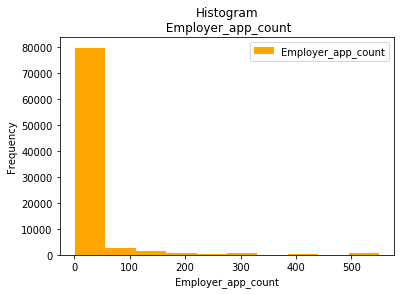

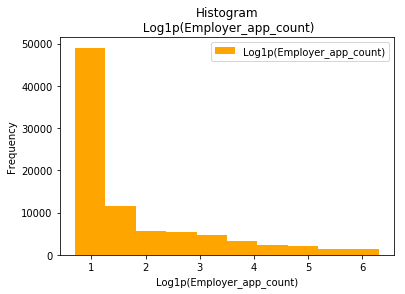

In [62]:
legend = ['Employer_app_count']

plt.hist(df_clean['Employer_app_count'], color=['orange'])
plt.xlabel("Employer_app_count")
plt.ylabel("Frequency")
plt.legend(legend)
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
plt.title('Histogram\n Employer_app_count')
plt.show()



# plt.hist((df_clean['Monthly_Income'])


legend = ['Log1p(Employer_app_count)']

plt.hist(np.log1p(df_clean['Employer_app_count']), color=['orange'])
plt.xlabel("Log1p(Employer_app_count)")
plt.ylabel("Frequency")
plt.legend(legend)
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
plt.title('Histogram\n Log1p(Employer_app_count)')
plt.show()


# plt.hist(np.log1p(df_clean['Monthly_Income']))

### Salary_Account

In [63]:
df_clean['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

- wybieram 10 największych banków, dla pozostały uzupełniam 'inne'

In [0]:
banks = ['HDFC Bank','ICICI Bank','State Bank of India','Axis Bank',
     'Citibank','Kotak Bank','IDBI Bank','Punjab National Bank',
     'Bank of India', 'Bank of Baroda']
def map_bank(df):
    if df['Salary_Account'] in banks:
        return df['Salary_Account']
    else:
        return 'Other'
        
df_clean['new_Salary_Account'] = df_clean.apply(map_bank, axis=1)

In [65]:
df_clean['new_Salary_Account'].value_counts()

Other                   25573
HDFC Bank               17695
ICICI Bank              13636
State Bank of India     11843
Axis Bank                8783
Citibank                 2376
Kotak Bank               2067
IDBI Bank                1550
Punjab National Bank     1201
Bank of India            1170
Bank of Baroda           1126
Name: new_Salary_Account, dtype: int64

### Mobile_Verified

In [66]:
df_clean['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [67]:
df_clean['Mobile_Verified'].isnull().values.any()

False

### Var5

In [68]:
df_clean['Var5'].value_counts()

0     29087
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

In [69]:
df_clean['Var5'].isnull().values.any()

False

### Var1

In [70]:
df_clean['Var1'].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [71]:
df_clean['Var1'].isnull().values.any()

False

### Interest_Rate

In [72]:
df_clean['Interest_Rate'].value_counts()

20.00    4707
14.85    2016
13.99    1699
31.50    1696
15.25    1553
16.75    1518
18.25    1312
15.50    1292
28.50     950
18.40     800
13.00     660
24.00     649
19.00     625
15.75     557
13.50     521
18.15     506
35.50     493
18.00     474
17.00     416
16.25     370
17.50     359
18.50     315
37.00     302
14.49     292
13.49     275
14.25     262
13.75     255
14.50     229
16.00     217
32.50     212
         ... 
25.50      65
16.20      65
15.35      57
31.00      56
29.00      46
14.80      37
16.15      31
29.50      26
27.50      26
14.99      22
21.50      21
19.05      18
26.50      16
23.00      15
30.50      13
15.10      12
24.50      11
15.80       7
14.90       7
14.30       6
28.00       6
15.70       6
15.99       5
14.00       4
15.49       3
14.55       2
20.50       2
15.60       1
14.29       1
15.15       1
Name: Interest_Rate, Length: 73, dtype: int64

In [73]:
df_clean[['Interest_Rate','Disbursed']].corr()

,Interest_Rate,Disbursed
Interest_Rate,1.00000,-0.09241
Disbursed,-0.09241,1.00000


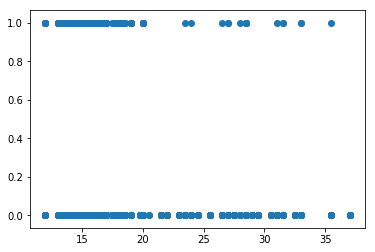

In [74]:
import matplotlib.pyplot as plt
plt.scatter(df_clean[['Interest_Rate']],df_clean[['Disbursed']])

In [75]:
df_clean['Interest_Rate'].isnull().sum()

59294

- bardzo dużo braków danych - kolumna do usunięcia

### Processing_Fee

In [76]:
df_clean['Processing_Fee'].value_counts()

2000.0     3074
1000.0     2067
4000.0     2006
3000.0     1286
6000.0     1183
10000.0    1093
1500.0      641
5000.0      584
2500.0      552
4500.0      468
3800.0      319
2900.0      317
3600.0      296
4200.0      287
4400.0      282
3300.0      276
3200.0      267
3500.0      264
1600.0      256
8000.0      248
6800.0      241
4800.0      241
2400.0      231
7500.0      228
5800.0      223
2600.0      210
500.0       196
20000.0     195
1800.0      188
9000.0      186
           ... 
9040.0        1
200.0         1
33800.0       1
15975.0       1
24600.0       1
8910.0        1
15300.0       1
6880.0        1
325.0         1
21800.0       1
2107.0        1
26100.0       1
8125.0        1
10700.0       1
19300.0       1
13650.0       1
10625.0       1
9702.0        1
560.0         1
3675.0        1
2375.0        1
6320.0        1
4125.0        1
22200.0       1
1120.0        1
13464.0       1
3969.0        1
7326.0        1
5920.0        1
9120.0        1
Name: Processing_Fee, Le

In [77]:
df_clean['Processing_Fee'].isnull().sum()

59600

- bardzo dużo braków danych - kolumna do usunięcia

### EMI_Loan_Submitted

In [78]:
df_clean['EMI_Loan_Submitted'].value_counts()

3716.36     288
7948.17     252
5089.58     240
5298.78     229
8742.98     218
7432.72     215
10597.55    214
7683.23     183
2649.39     177
8852.07     155
11855.63    140
11960.68    136
4327.73     135
12026.60    133
11631.53    132
11947.21    118
13246.94    114
7007.89     109
6086.07     103
9537.80     102
9037.63     100
5668.78      99
7745.56      97
10696.25     96
3688.36      95
11149.08     95
7215.96      92
7376.73      91
9129.11      90
13877.39     89
           ... 
3534.41       1
3505.84       1
9374.41       1
10231.37      1
15519.34      1
15743.93      1
13974.90      1
45368.75      1
2992.65       1
3912.17       1
17147.15      1
22629.09      1
31672.39      1
6357.28       1
29974.44      1
6430.26       1
9970.40       1
6799.84       1
1811.38       1
10016.39      1
37426.64      1
8451.80       1
14368.46      1
3528.91       1
25882.81      1
12558.05      1
4530.63       1
46168.22      1
1674.50       1
11463.79      1
Name: EMI_Loan_Submitted

In [79]:
df_clean['EMI_Loan_Submitted'].isnull().sum()

59294

- bardzo dużo braków danych - kolumna do usunięcia

### Filled_Form

In [80]:
df_clean['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [81]:
df_clean['Filled_Form'].isnull().sum() 

0

In [82]:
df_clean.groupby(['Filled_Form'])['Disbursed'].mean().round(4)

Filled_Form
N    0.0122
Y    0.0229
Name: Disbursed, dtype: float64

### Device_Type

In [83]:
df_clean['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [84]:
df_clean['Device_Type'].isnull().sum() 

0

### Var2

In [85]:
df_clean['Var2'].value_counts()

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [86]:
df_clean['Var2'].isnull().sum() 

0

### Source

In [87]:
df_clean['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S138        3
S139        3
S129        3
S136        3
S135        2
S130        1
S140        1
S154        1
S125        1
Name: Source, dtype: int64

- zostawiam najczęściej występujące, pozostałe traktuję zbiorczo

In [0]:
source = ['S122' ,'S133', 'S159','S143','S127','S137','S134']
def map_source(df):
    if df['Source'] in source:
        return df['Source']
    else:
        return 'S100'
        
df_clean['new_Source'] = df_clean.apply(map_source, axis=1)

In [89]:
df_clean['new_Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S100     3681
S127     1931
S137     1724
S134     1301
Name: new_Source, dtype: int64

In [90]:
df_clean['new_Source'].isnull().sum() 

0

### Var4

In [91]:
df_clean['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

In [92]:
df_clean['Var4'].isnull().sum() 

0

### analiza skośności dla new_Loan_Amount_Applied, new_Loan_Amount_Submitted,Existing_EMI

In [0]:
def skew_print(dataset):
    print('skośność przed transforamcją logarytmiczną: \n', dataset.name, '\n', dataset.skew().round(2))
    print('skośność po transforamcji logarytmicznej: \n', dataset.name, '\n', np.log1p(dataset).skew().round(2))

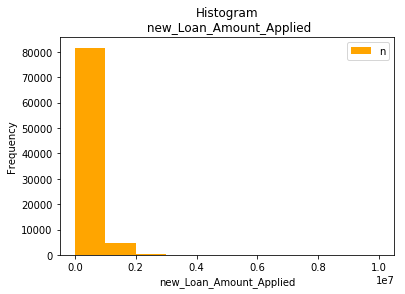

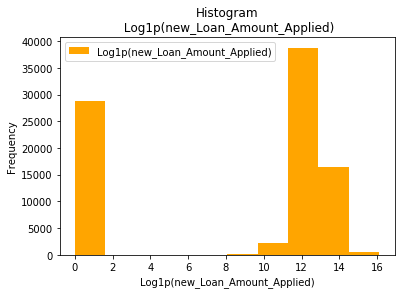

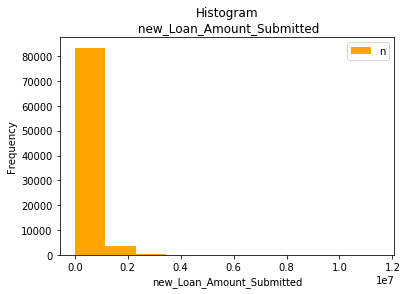

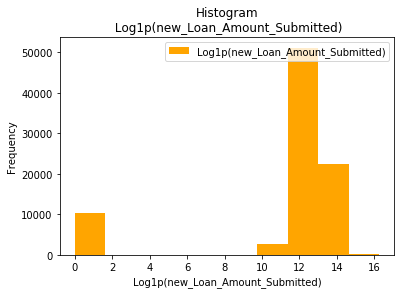

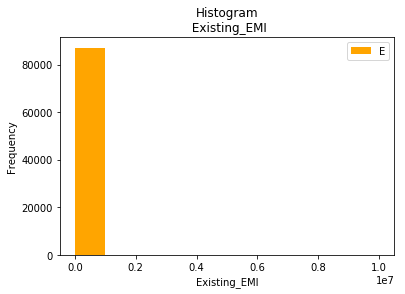

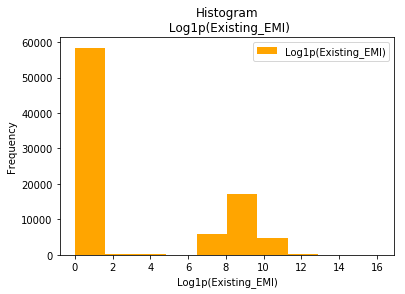

skośność przed transforamcją logarytmiczną: 
 new_Loan_Amount_Applied 
 5.64
skośność po transforamcji logarytmicznej: 
 new_Loan_Amount_Applied 
 -0.67
skośność przed transforamcją logarytmiczną: 
 new_Loan_Amount_Submitted 
 4.13
skośność po transforamcji logarytmicznej: 
 new_Loan_Amount_Submitted 
 -2.19
skośność przed transforamcją logarytmiczną: 
 Existing_EMI 
 211.85
skośność po transforamcji logarytmicznej: 
 Existing_EMI 
 0.79


In [94]:
hist_plot(df_clean['new_Loan_Amount_Applied'])
hist_plot(df_clean['new_Loan_Amount_Submitted'])
hist_plot(df_clean['Existing_EMI'])

skew_print(df_clean['new_Loan_Amount_Applied'])
skew_print(df_clean['new_Loan_Amount_Submitted'])
skew_print(df_clean['Existing_EMI'])

- logarytmuję

In [0]:
df_clean['log_new_Loan_Amount_Applied'] = np.log1p(df_clean['new_Loan_Amount_Applied'])
df_clean['log_new_Loan_Amount_Submitted'] = np.log1p(df_clean['new_Loan_Amount_Submitted'])
df_clean['log_Existing_EMI'] = np.log1p(df_clean['Existing_EMI'])

In [96]:
new_df_clean = df_clean.drop(['Interest_Rate','Processing_Fee','EMI_Loan_Submitted','DOB','new_DOB', 'DOB_Year', 'Lead_Creation_Date',
       'LCD_Year','new_Lead_Creation_Date', 'Loan_Amount_Submitted',
       'Loan_Amount_Applied', 'Loan_Tenure_Submitted',
       'Loan_Tenure_Applied', 'Employer_Name', 'Salary_Account',
       'Source'], axis=1)
new_df_clean.columns

Index(['Gender', 'City', 'Monthly_Income', 'Existing_EMI', 'Mobile_Verified',
       'Var5', 'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Var4',
       'Disbursed', 'Log_Monthly_Income', 'Age', 'new_Loan_Amount_Submitted',
       'new_Loan_Amount_Applied', 'new_Loan_Tenure_Submitted',
       'new_Loan_Tenure_Applied', 'Employer_app_count', 'new_Salary_Account',
       'new_Source', 'log_new_Loan_Amount_Applied',
       'log_new_Loan_Amount_Submitted', 'log_Existing_EMI'],
      dtype='object')

In [97]:
new_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
Gender                           87020 non-null int64
City                             87020 non-null object
Monthly_Income                   87020 non-null int64
Existing_EMI                     87020 non-null float64
Mobile_Verified                  87020 non-null object
Var5                             87020 non-null int64
Var1                             87020 non-null object
Filled_Form                      87020 non-null object
Device_Type                      87020 non-null object
Var2                             87020 non-null object
Var4                             87020 non-null int64
Disbursed                        87020 non-null int64
Log_Monthly_Income               87020 non-null float64
Age                              87020 non-null int64
new_Loan_Amount_Submitted        87020 non-null float64
new_Loan_Amount_Applied          87020 non-null float64
new_Loan_Tenu

In [98]:
new_df_clean.isnull().values.any()

False

In [0]:
data = pd.get_dummies(new_df_clean,drop_first=True)

In [100]:
data.shape

(87020, 71)

In [0]:
data_log = data.drop(['Monthly_Income','new_Loan_Amount_Applied','new_Loan_Amount_Submitted','Existing_EMI'], axis=1, inplace=False).copy()
data_nolog = data.drop(['Log_Monthly_Income','log_new_Loan_Amount_Applied','log_new_Loan_Amount_Submitted','log_Existing_EMI'], axis=1, inplace=False).copy()

# Modelowanie

In [0]:
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, f1_score
import time
from tabulate import tabulate

W projekcie wykorzystam roc_auce jako miarę oceny jakości modelu (accuracy score w szczególności dla znacząco niezbalansowanej próby może mylnie przedstawiać model jako bardzo dobry przewidując tylko wartości przeważające w próbie). Dodatkowo porównam (dla wybranych modeli) metody 'undersampling' oraz 'oversamplig' dla prób niezbalansowanych. Dalsze analizy możne rozszerzyć o analizę wartości odstających, inny sposób preprocessingu danych czy analizę dodatkowych miar jakości działania modelu.

Literatura:
1. An Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly). Copyright 2017 Sarah, Guido and Andreas Müller, 978-1-449-36941-5.
2. Python 3: from None to Machine Learning by Matt Harasymczuk. Copyright 2019, Matt Harasymczuk  <matt@astrotech.io> Revision e95e81d0. http://python.astrotech.io/

### Buduję pierwszy bazowy model (Regresja logistyczna z regularyzacją l1)

In [103]:
y = data_log.Disbursed
X = data_log.drop(["Disbursed"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression(penalty='l1', random_state=42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('accuracy test = ', model.score(X_test, y_test))
print('f1 score train = ', f1_score(y_train,model.predict(X_train)))
print('f1 score test', f1_score(y_test,model.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy test =  0.9846012410940014
f1 score train =  0.0
f1 score test 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy score bardzo wysoki ponieważ model przewiduje same 0 (próba niezbalansowana)

In [104]:
prediction.sum() # f1_score nie może zostać policzony, ponieważ model przewiduje tylko 0 (próba niezbalansowana)

0

- sprawdzam, czy skalowanie z wykorzystaniem StandardScaler'a poprawi działanie modelu (f1)

In [105]:
pipe = Pipeline([("scaler", StandardScaler()),("model",LogisticRegression(penalty='l1', random_state=42))])
pipe.fit(X_train, y_train)
print('accuracy test = ', accuracy_score(y_test, pipe.predict(X_test)))
print('f1 score test = ', f1_score(y_test,pipe.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy test =  0.9846012410940014
f1 score test =  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


##### niezbalansowane klasy

count_class_0:  85747 , count_class_1:  1273


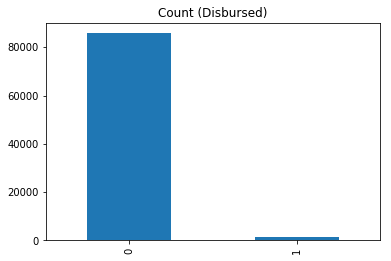

In [106]:
bank = data_log.copy()
count_class_0, count_class_1 = bank['Disbursed'].value_counts()
print('count_class_0: ', count_class_0, ', count_class_1: ', count_class_1)
bank_class_0=bank[bank['Disbursed']==0]
bank_class_1=bank[bank['Disbursed']==1]
bank['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

In [0]:
# funkcja, która wyświtla confusion matrix w bardziej czytelnej formie
def print_conf(a):
    a_list=a.tolist()
    a_list[0].insert(0,'Real 0')
    a_list[1].insert(0,'Real 1')
    print (tabulate (a_list,headers=['Real/Pred','Pred 0', 'Pred 1']))

- undersampling

count_class_0:  68611 , count_class_1:  1005


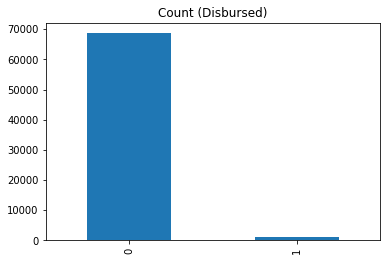

In [108]:
bank = data_log.copy()
X_train, X_test, y_train, y_test = train_test_split(bank.drop(["Disbursed"], axis = 1), bank.Disbursed, test_size=0.2, random_state=123)

X_concat = pd.concat([X_train, y_train], axis=1)

count_class_0, count_class_1 = X_concat['Disbursed'].value_counts()
print('count_class_0: ', count_class_0, ', count_class_1: ', count_class_1)
bank_class_0=X_concat[X_concat['Disbursed']==0]
bank_class_1=X_concat[X_concat['Disbursed']==1]
X_concat['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

1    1005
0    1005
Name: Disbursed, dtype: int64


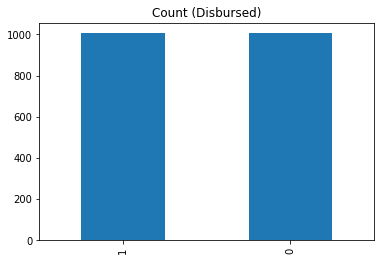

In [109]:
bank_class_0_under=bank_class_0.sample(count_class_1)
bank_under = pd.concat([bank_class_0_under,bank_class_1],axis=0)
print(bank_under['Disbursed'].value_counts())
bank_under['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

In [0]:
X_train = bank_under.drop(["Disbursed"], axis = 1)
y_train = bank_under.Disbursed

In [110]:
print('\nLogisticRegression (l1)')
model = LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('model.score test = ', model.score(X_test, y_test))
      
y_pred = model.predict_proba(X_train)[:,1]
print('AUC train = ', roc_auc_score(y_score=y_pred,y_true=y_train))
y_pred = model.predict_proba(X_test)[:,1]
print('AUC test = ', roc_auc_score(y_score=y_pred,y_true=y_test))
      
print('accuracy train = ', accuracy_score(y_train,model.predict(X_train)))
print('accuracy test = ', accuracy_score(y_test,model.predict(X_test)))
print('f1 train = ', f1_score(y_train,model.predict(X_train)))
print('f1 test = ', f1_score(y_test,model.predict(X_test)))

print('\nStandard Scaler + LogisticRegression (l1)')
pipe = Pipeline([("scaler", StandardScaler()),("model",LogisticRegression(penalty='l1', random_state=42, solver='liblinear'))])
pipe.fit(X_train, y_train)
print('model.score test = ', pipe.score(X_test, y_test))      
y_pred = pipe.predict_proba(X_train)[:,1]
print('AUC train = ', roc_auc_score(y_score=y_pred,y_true=y_train))
y_pred = pipe.predict_proba(X_test)[:,1]
print('AUC test = ', roc_auc_score(y_score=y_pred,y_true=y_test))
print('accuracy train = ', accuracy_score(y_train,pipe.predict(X_train)))
print('accuracy test = ', accuracy_score(y_test, pipe.predict(X_test)))
print('f1 train = ', f1_score(y_train,pipe.predict(X_train)))
print('f1 test = ', f1_score(y_test,pipe.predict(X_test)))

print('\nMaxAbsScaler + LogisticRegression (l1)')
pipe = Pipeline([("scaler", MaxAbsScaler()),("model",LogisticRegression(penalty='l1', random_state=42, solver='liblinear'))])
pipe.fit(X_train, y_train)
print('model.score test = ', pipe.score(X_test, y_test)) 
y_pred = pipe.predict_proba(X_train)[:,1]
print('AUC train = ', roc_auc_score(y_score=y_pred,y_true=y_train))
y_pred = pipe.predict_proba(X_test)[:,1]
print('AUC test = ', roc_auc_score(y_score=y_pred,y_true=y_test))
print('accuracy train = ', accuracy_score(y_train,pipe.predict(X_train)))
print('accuracy test = ', accuracy_score(y_test, pipe.predict(X_test)))
print('f1 train = ', f1_score(y_train,pipe.predict(X_train)))
print('f1 test = ', f1_score(y_test,pipe.predict(X_test)))


LogisticRegression (l1)
model.score test =  0.7290852677545392
AUC train =  0.8478156481275215
AUC test =  0.8171933574424795
accuracy train =  0.7746268656716417
accuracy test =  0.7290852677545392
f1 train =  0.7795620437956204
f1 test =  0.08035888433781939

Standard Scaler + LogisticRegression (l1)
model.score test =  0.7289703516433004
AUC train =  0.8509927972079899
AUC test =  0.8175408845130092
accuracy train =  0.7805970149253731
accuracy test =  0.7289703516433004
f1 train =  0.7847730600292826
f1 test =  0.08032754922986937

MaxAbsScaler + LogisticRegression (l1)
model.score test =  0.7293150999770168
AUC train =  0.8470829929952229
AUC test =  0.8149442301796341
accuracy train =  0.7761194029850746
accuracy test =  0.7293150999770168
f1 train =  0.7807017543859649
f1 test =  0.07934336525307796


In [111]:
# na testowym zbiorze dla modelu regresji logistycznej bez skalowania
y_pred = model.predict_proba(X_test)[:,1]
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))
z = (model.coef_==0)
np.where(z,X_train.columns,0)
predictions = np.where(y_pred>=0.5,1,0)
print_conf(confusion_matrix(y_test, predictions))
print("F1:",f1_score(y_test, predictions))

AUC:  0.8171933574424795
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          12483      4653
Real 1             62       206
F1: 0.08035888433781939


- Automatyzacja doboru metaparametrów (analiza dla wybranych modeli)

In [0]:
def model_sel(uses,names,models,parameters,cv_param=3,scoring_param="roc_auc"):
    """
    Help to select model based on specified models and parameters using GridSearchCV.
    Importing libraries to fit selected models, GridSearchCV, Pipeline needed to properly run the function.
    X_train, X_test, y_train, y_test need to be specified upfront.
    
    Keyword arguments:
    uses -- list with True or False that inform if model should be analyzed
    names -- list of models' names
    models -- list of models to be used in Pipeline with proper format required by Pipeline
    parameters -- list of parameters to be analyzed by GridSearchCV
    
    Optional keyword arguments:
    cv_param -- int, cross-validation generator or an iterable, default = 3
    scoring_param -- string, scoring to evaluate the model, default = "roc_auc"
    
    Returns information about analyzed models and comparison of models performance based on test sample.
    """
    if len(names) != len(models) or len(models) != len(parameters) or len(parameters) != len(uses):
        print("len(names)", len(names))
        print("len(models)", len(models))
        print("len(parameters)", len(parameters))
        print("len(uses)", len(uses))
        raise ValueError("Listy wejściowe nie są równej długości!")

    best_models = []
    best_params = []

    for use, name, model, parameter in zip(uses, names, models, parameters):
        if not use:
            best_models.append(99)
            best_params.append(99)
            continue
        print("Analiza dla modelu:", name)
        pipe = Pipeline(model)
        start = time.time()
        gs = GridSearchCV(pipe, parameter, cv=cv_param, scoring=scoring_param)
        gs.fit(X_train, y_train)
        end = time.time()

        for mean, std, params, fittime, scoretime in zip(gs.cv_results_["mean_test_score"], gs.cv_results_["std_test_score"], gs.cv_results_["params"], gs.cv_results_["mean_fit_time"], gs.cv_results_["mean_score_time"]):
            print("mean: ", np.round(mean, 3), ", std: ", np.round(std, 3), " ", params, " fit time: ", np.round(fittime, 3), " score time: ", np.round(scoretime, 3), sep="")

        print("end - start: ", end-start)
        print("z gs: ", 10 * (gs.cv_results_["mean_fit_time"]+gs.cv_results_["mean_score_time"]).sum())

        best_models.append(gs.best_estimator_)
        best_params.append(gs.best_params_)

    print("")
        
    tested_models_tbl = []
    auc_test_tbl = []
    f1_test_tbl = []

    compare_dict = {'Method': tested_models_tbl,
         'AUC Score test': auc_test_tbl,
         'F1 Score test': f1_test_tbl     
        }

    print("Wyniki na zbiorze testowym:")
    for use, name, best_model, best_param in zip(uses, names, best_models, best_params):
        if not use:
            continue
        print(name, " (", best_param, "):", accuracy_score(y_true=y_test,y_pred=best_model.predict(X_test)), sep="")
        y_prediction = best_model.predict_proba(X_test)[:,1]
        auc_test = roc_auc_score(y_score=y_prediction,y_true=y_test)
        print( "AUC test: ", auc_test)
        f1_test = f1_score(y_true=y_test,y_pred=best_model.predict(X_test))
        print('f1 test = ', f1_test)
        tested_models_tbl.append(name)
        f1_test_tbl.append(f1_test)
        auc_test_tbl.append(auc_test)

    compare_dict = {'Method': tested_models_tbl,
         'AUC Score test': auc_test_tbl,
         'F1 Score test': f1_test_tbl     
        }
    compare_df = pd.DataFrame(compare_dict)
    display(compare_df)

In [0]:
uses = [True, True, True, True, True, True]

names = ["Regresja logistyczna", 
         "MaxAbsScaler - Regresja logistyczna", 
         "StandardScaler - Regresja logistyczna", 
         "Drzewo decyzyjne", 
         "Naiwny Bayes", 
         "RandomForestClassifier"]

models = [
             [("model",LogisticRegression(solver="liblinear"))],
             [("scaler", MaxAbsScaler()),("model",LogisticRegression(solver="liblinear"))],
             [("scaler", StandardScaler()),("model",LogisticRegression(solver="liblinear"))],
             [("model", DecisionTreeClassifier())],
             [("model", MultinomialNB())],
             [("model", RandomForestClassifier(n_jobs=-1))]
         ]

parameters = [{"model__C": [0.01, 0.1, 1, 10, 100], "model__penalty": ["l1", "l2"]},
              {"model__C": [0.01, 0.1, 1, 10, 100], "model__penalty": ["l1", "l2"]},
              {"model__C": [0.01, 0.1, 1, 10, 100], "model__penalty": ["l1", "l2"]},
              {"model__criterion":["gini", "entropy"]},
              {},
              {"model__n_estimators": [100, 300, 500],
               "model__bootstrap": [False]
              }
              ]
cv_param = 3
scoring_param = "roc_auc"

In [127]:
model_sel(uses,names,models,parameters,cv_param,scoring_param)

Analiza dla modelu: Regresja logistyczna
mean: 0.768, std: 0.008 {'model__C': 0.01, 'model__penalty': 'l1'} fit time: 0.043 score time: 0.01
mean: 0.796, std: 0.005 {'model__C': 0.01, 'model__penalty': 'l2'} fit time: 0.039 score time: 0.012
mean: 0.795, std: 0.005 {'model__C': 0.1, 'model__penalty': 'l1'} fit time: 0.118 score time: 0.009
mean: 0.813, std: 0.003 {'model__C': 0.1, 'model__penalty': 'l2'} fit time: 0.044 score time: 0.007
mean: 0.826, std: 0.008 {'model__C': 1, 'model__penalty': 'l1'} fit time: 0.582 score time: 0.009
mean: 0.821, std: 0.007 {'model__C': 1, 'model__penalty': 'l2'} fit time: 0.091 score time: 0.008
mean: 0.826, std: 0.011 {'model__C': 10, 'model__penalty': 'l1'} fit time: 0.978 score time: 0.005
mean: 0.825, std: 0.01 {'model__C': 10, 'model__penalty': 'l2'} fit time: 0.06 score time: 0.006
mean: 0.826, std: 0.012 {'model__C': 100, 'model__penalty': 'l1'} fit time: 0.679 score time: 0.005
mean: 0.826, std: 0.012 {'model__C': 100, 'model__penalty': 'l2'} 

,Method,AUC Score test,F1 Score test
0,Regresja logistyczna,0.817773,0.080832
1,MaxAbsScaler - Regresja logistyczna,0.817576,0.080566
2,StandardScaler - Regresja logistyczna,0.817670,0.080046
3,Drzewo decyzyjne,0.708548,0.067427
4,Naiwny Bayes,0.725551,0.058824
5,RandomForestClassifier,0.834210,0.077981


- oversampling

Należy pamiętać, aby najpierw podzielić dane na zbiór treningowy i testowy (co zostało wykonane). W innym przypadku może zdarzyć się, że zbiór testowy oraz treningowy będą zwierały te same obserwacje.

1    68611
0    68611
Name: Disbursed, dtype: int64


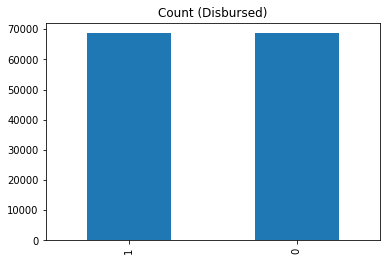

In [130]:
bank_class_1_over=bank_class_1.sample(count_class_0,replace=True) # ze zwracaniem, ponieważ nie mamy tyle danych
bank_over = pd.concat([bank_class_0,bank_class_1_over],axis=0)
print(bank_over['Disbursed'].value_counts())
bank_over['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

In [0]:
X_train = bank_over.drop(["Disbursed"], axis = 1)
y_train = bank_over.Disbursed

In [0]:
uses = [True, True, True, True, True, True]

names = ["Regresja logistyczna", 
         "MaxAbsScaler - Regresja logistyczna", 
         "StandardScaler - Regresja logistyczna", 
         "Drzewo decyzyjne", 
         "Naiwny Bayes", 
         "RandomForestClassifier"]

models = [
             [("model",LogisticRegression(solver="liblinear"))],
             [("scaler", MaxAbsScaler()),("model",LogisticRegression(solver="liblinear"))],
             [("scaler", StandardScaler()),("model",LogisticRegression(solver="liblinear"))],
             [("model", DecisionTreeClassifier())],
             [("model", MultinomialNB())],
             [("model", RandomForestClassifier(n_jobs=-1))]
         ]

parameters = [{"model__C": [100, 200, 1000], "model__penalty": ["l1", "l2"]},
              {"model__C": [100, 200, 1000], "model__penalty": ["l1", "l2"]},
              {"model__C": [100, 200, 1000], "model__penalty": ["l1", "l2"]},
              {"model__criterion":["gini", "entropy"]},
              {},
              {"model__n_estimators": [100, 300, 500],
               "model__bootstrap": [False]
              }
              ]

In [135]:
model_sel(uses,names,models,parameters)

Analiza dla modelu: Regresja logistyczna
mean: 0.839, std: 0.002 {'model__C': 100, 'model__penalty': 'l1'} fit time: 34.599 score time: 0.031
mean: 0.839, std: 0.002 {'model__C': 100, 'model__penalty': 'l2'} fit time: 4.86 score time: 0.032
mean: 0.839, std: 0.002 {'model__C': 200, 'model__penalty': 'l1'} fit time: 31.913 score time: 0.031
mean: 0.839, std: 0.002 {'model__C': 200, 'model__penalty': 'l2'} fit time: 4.208 score time: 0.031
mean: 0.839, std: 0.002 {'model__C': 1000, 'model__penalty': 'l1'} fit time: 40.531 score time: 0.035
mean: 0.839, std: 0.002 {'model__C': 1000, 'model__penalty': 'l2'} fit time: 4.683 score time: 0.031
end - start:  369.6801640987396
z gs:  1209.8461174964905
Analiza dla modelu: MaxAbsScaler - Regresja logistyczna
mean: 0.839, std: 0.002 {'model__C': 100, 'model__penalty': 'l1'} fit time: 120.729 score time: 0.047
mean: 0.839, std: 0.002 {'model__C': 100, 'model__penalty': 'l2'} fit time: 4.484 score time: 0.048
mean: 0.839, std: 0.002 {'model__C': 20

,Method,AUC Score test,F1 Score test
0,Regresja logistyczna,0.827884,0.086319
1,MaxAbsScaler - Regresja logistyczna,0.827838,0.086249
2,StandardScaler - Regresja logistyczna,0.827838,0.086249
3,Drzewo decyzyjne,0.520198,0.054545
4,Naiwny Bayes,0.727933,0.061959
5,RandomForestClassifier,0.824091,0.007380
